<h1>Decision Trees - Learning Nonlinearities using Rules</h1>

<b>Outline</b>
<ul>
    <li>Decision Trees: Concept</li>
    <li>Decision Trees: Examining nonlinearity learning</li>
    <li>Decision Trees: Boosting generalisation via pruning</li>
</ul>

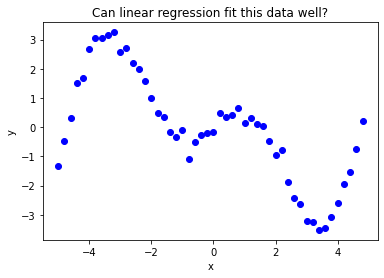

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/mlinsights/freemium/main/datasets/regression-analysis/1d_nonlinear_regression_data.csv')
x = df[['x']]
y = df[['y']]

plt.figure()
plt.scatter(x,y,color="blue")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Can linear regression fit this data well?')
plt.show() 

<h2>1. Introduction </h2>

Decision trees are universal approximators that use recursive partitioning to divide the datasets into homogenous subgroups.

<img src="media/decision_trees_.png" width="400px"/>

The <b>top node</b> is referred to as the <b>root node</b> and is the starting decision node. (i.e., Gender is Male or Female?). A <b>branch</b> is a subset of the dataset obtained as an outcome of a test. <b>Internal nodes</b> are decision nodes based on which subsequent branches are obtained. The <b>depth</b> of a node is the minimum number of decisions it takes to reach it from the root node. The leaf nodes are the end of the last branches on the tree which determine the output (class label or regression value).

<h2>2. Building a decision tree</h2>

Given a dataset of <b>n features and m records</b>, a rule-based graph is formed <b>iteratively by recursive partitioning</b> until the datasets is split in homogenous data groups representing the <b>same target class</b> in a classification problem or <b>sharing close target values</b> in a regression problem .

1. From the root node (i.e. with all the m records), the most informative attribute is identified using some feature important score. The <b>Gini index</b> is the most commonly used feature importance score among others (entropy, information gain)

$$ Gini(f) = \sum_{i=1}^{N_c}P(class=i|f)(1-P(class=i|f))  = 1 - \sum_{i=1}^{N_c}P(class=i|f)^2 $$

Overall Gini coefficient:

$$
Gini(f) = \frac{n_{S_i}}{n_{S_i}+n_{S_j}}Gini(f_{S_i}) + \frac{n_{S_j}}{n_{S_i}+n_{S_j}}Gini(f_{S_j})
$$

<b>The feature with the lowest gini index is selected</b>

For a regression problem, the quality of the split is typically measured using the mean squre error:

$$
\bar{y} = \frac{1}{n_{S_i}}\sum_{y\in S_i}^{}y
$$

$$
MSE(S_i) = \frac{1}{n_{S_i}}\sum_{i=1}^{n_{S_i}}(\bar{y}-y_i)^2
$$

2- Given an appropriate feature importance selection criterion, the decision tree is thus built as follows by recursive partitioning.

<b>Decision Tree Pseudo-code</b>

Step 1: Given M attributes in a dataset N records and a target variable y<br/>
Step 2: Rank features as per the chosen feature importance score<br/>
Step 3: Split the dataset by the feature with the best importance score<br/>
Step 4: Repeat Step 2 to each new subset until a stopping criterion is met

<h3>3. Pruning a decision tree</h3>

A decision tree can reach 100% fitting accuracy on the training set given that it can further split the data until a single data (i.e. guaranteed homogeneity) remains. However, this comes with the risk that the algorithm may lose its generalisation capability on unseen data. A pruning phase may post-process the decision tree, undermine some rules and allow some level of heterogeneity in the data subgroups to secure generalisation on unseen data.

<h2>Python Implementation</h2>

<h4>Case Study-0: Learning Nonlinearities</h4>

In [60]:
#--Build the Decision Tree Regression model
from sklearn.tree import DecisionTreeRegressor

df = pd.read_csv('https://raw.githubusercontent.com/mlinsights/freemium/main/datasets/regression-analysis/1d_nonlinear_regression_data.csv')

x = df[['x']]
y = df[['y']]

dt_regressor = DecisionTreeRegressor(criterion="squared_error",max_depth=None,min_samples_leaf=1)
#traing decision tree model
dt_regressor.fit(x,y)


DecisionTreeRegressor()

In [61]:
#predict the observation data
y_pred = dt_regressor.predict(x)
#y_pred.tolist()
x_n = x.to_numpy().reshape(1,-1)[0].tolist()

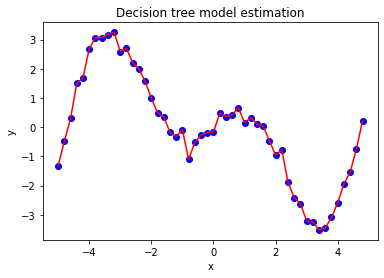

In [62]:
plt.figure()
plt.scatter(x,y,color="blue")
plt.plot(x_n,y_pred,color="red")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision tree model estimation')
plt.show() 

<h4>Case Study-1: House Price Valuation using Decision Trees (Multivariate problem)</h4>

In [13]:
#--load the datasets
import pandas as pd
import warnings
warnings.filterwarnings('ignore') #ignore warnings
df = pd.read_csv('https://raw.githubusercontent.com/mlinsights/freemium/main/datasets/regression-analysis/real-estate-house-pricing/real_estate_data.csv')
df = df.iloc[:,1:] #retrieve house pricing data
df.head()

,house_age,dist_nStation,num_cStores,dist_nStation.1,lat,long,house_p
0,32.0,84.87882,10,84.87882,24.98298,121.54024,3221.5
1,19.5,306.59470,9,306.59470,24.98034,121.53951,3587.0
2,13.3,561.98450,5,561.98450,24.98746,121.54391,4020.5
3,13.3,561.98450,5,561.98450,24.98746,121.54391,4658.0
4,5.0,390.56840,5,390.56840,24.97937,121.54245,3663.5


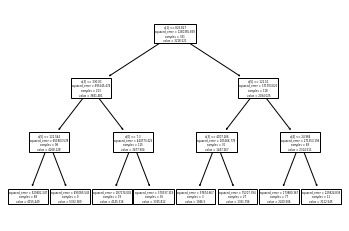

In [18]:
#--extract features and the target variable
X = df.iloc[:,0:6]#get features
y = df.iloc[:,[6]]#get target variable
X.head()

#--Split the the training set from the test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1234)#fix the random seed (to reproduce the results)

#--Build the Decision Tree Regression model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn import tree

dt_regressor = DecisionTreeRegressor(criterion="squared_error",max_depth=3,min_samples_leaf=1)#Setting the decision tree - settings
#dt_regressor = DecisionTreeRegressor(criterion="squared_error",max_depth=None,min_samples_leaf=2)#Setting the decision tree - settings

dt_regressor.fit(X_train,y_train)#train the classifier
tree.plot_tree(dt_regressor) #display the model rules
plt.show()

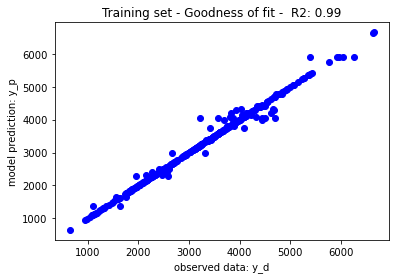

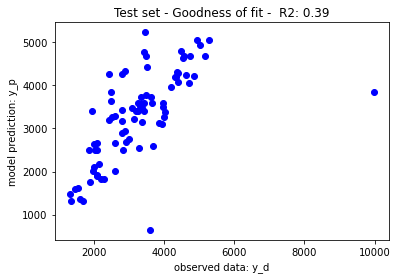

In [15]:
#--Compute the Coefficient of determination and visualise the goodness of fit for both the training and test setfrom sklearn.metrics import r2_score
y_pred_train = dt_regressor.predict(X_train)#get model prediction on training set
y_pred_test = dt_regressor.predict(X_test)#get model prediction on test

r2_score_train = r2_score(y_train,y_pred_train)
r2_score_test = r2_score(y_test,y_pred_test)

plt.figure()
plt.scatter(y_train, y_pred_train, color="b")
plt.xlabel('observed data: y_d')
plt.ylabel('model prediction: y_p')
plt.title('Training set - Goodness of fit -  R2: %.2f'%r2_score_train)
plt.show() 

plt.figure()
plt.scatter(y_test, y_pred_test, color="b")
plt.xlabel('observed data: y_d')
plt.ylabel('model prediction: y_p')
plt.title('Test set - Goodness of fit -  R2: %.2f'%r2_score_test)
plt.show()

<h3>The Bias and Variance Trade-off</h3>

<img src="https://raw.githubusercontent.com/YvesMatanga/freemium_datascience/main/machine-learning-tutorials/media/underfitting_goodfitting_overfitting.png" width="800px"/>

The <b>Bias of a model</b> refers to the strength of assumption made about its underlying relationship<br/><br/>
The <b>Variance of a model</b> refers to its sensitivity to slight changes in the training data.

An ideal model should have <b>Low Bias</b> and <b>Low Variance</b>, meaning it should make less assumption about the underlying relationship in the data, and yet must remain robust to maintain the true relationship in the data albeit small changes in the observation.

<h3>Test questions</h3>

a. Linear Regression has <b>Low/High Bias</b> and <b>Low/High Variance</b><br/>
b. Increasing the Bias may lead to <b>overfit/underfitting</b>?<br/>
c. Increasing the Bias may lead to <b>an increase/decrease in Variance</b>?<br/>
d. Decreasing the Bias may lead to <b>overfit/underfitting</b>?<br/>

<p style="color:blue">What do we notice? As we <b>Lower the Bias (which is good)</b>, we are likely to obtain <b>High Variance (which is bad) Leading</b> to Overfitting, and <b>Poor generalisation</b>.</p>

<h3>Limits and Benefits of Decision Trees</h3>

<b>Pros</b>
<ul>
    <li>Intrepretability</li>
    <li>Handling Nonlinear Relationships</li>
    <li>Handle mixed data types</li>
    <li>Automatic feature selection</li>
    <li>Low Bias, Non parametric</li>
</ul>

<b>Cons</b>
<ul>
    <li>Overtfitting</li>
    <li>High Variance and Instability: sensitive small changes in the dataset </li>
    <li>Computational expensive for large datasets</li>
</ul>

